# 

# Lab 3 Project (Titanic)

- **Author:** Aaron Gilllespie 
- **Date:** 2025-03-28
- **Objective:** Utilizing data from the Titanic manifest to train & test various types of classfiers.

This code base is being created in the course of completing module 3 of CSIS 44-670 from NW Missouri University. In this Jupyter Notebook which we will analyze data representing the passengers from the RMS Titanic, which sank in a very famous James Cameron movie (also real life). We are utilizing this dataset to, which [some research suggests](https://www.geeksforgeeks.org/python-titanic-data-eda-using-seaborn/) is a commonly utilized dataset for getting started with Machine Learning. In essence, this is the `hello world!` of my advnetures with machine learning. 

In this lab we're exploring 3 common types of classifiers: 

1. Decision Tree Classifier (DT)
2. Support Vector Machine (SVM)
3. Neural Network (NN)


## Section 1. Import and Inspect the Data

In this section we load a sample dataset from Seaborn's library into a DataFrame and do a standard set of what I'll call "getting to know you" methods to get a view of the dataset schema, its contents, the proportions of missing values, and any correlations that exist between the numerical columns.

Importing some standard libraries for working with data in Python.

In [636]:
# all imports get moved to the top - import each only once

import seaborn as sns
import pandas as pd

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

from sklearn.svm import SVC

from sklearn.neural_network import MLPClassifier


Loading the Titanic sample dataset from Seaborn. One of what appears to be [about 20 possible options](https://github.com/mwaskom/seaborn-data).

In [637]:
# Load Titanic dataset
titanic = sns.load_dataset('titanic')

## Section 2. Data Exploration and Preparation

### 2.1 Handle Missing Values and Clean Data

In this subsection we impute missing values for age with the median, and fill missing values from 'embark_town' with the mode.

In [638]:
titanic['age'] = titanic['age'].fillna(titanic['age'].median())
titanic['embark_town'] = titanic['embark_town'].fillna(titanic['embark_town'].mode()[0])

### 2.2 Feature Engineering

We will be adding:

1. family_size - number of family members on board
2. Convert categorical "sex" to numeric
3. Convert categorical "embarked" to numeric
4. Binary feature - convert "alone" to numeric

In [639]:
# Create new features
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})
titanic['alone'] = titanic['alone'].astype(int)

## Section 3. Feature Selection and Justification

### 3.1 Choose features and target

In this section we are seleting features from the dataset we will use to create a machine learning models from. These two features will be utilized to target the value of the `survived` column.

I believe in the James Cameron movie `Titanic` they were saying 'Women and Children first' - so I'm making my selection to see if that bares out in the dataset

- `sex` - to catch the "women" criteria
- `age` - to catch the "and children" criteria

### 3.2 Define X (features) and y (target)

Here's wehere the actual assignment of the features & target are happening (the Xes and Y).

In [640]:
# Case 1: alone only 
X = titanic[['alone']]
y = titanic['survived']

# Case 2: age only (or your choice)
# X = titanic[['age']]
# y = titanic['survived']

# Case 3: age + family_size (or your choice)
# X = titanic[['age', 'sex']]
# y = titanic['survived']

### Reflection 3:

**Why are these features selected?**
I chose age and sex to continue the trend I set in lab 02 to see if the whole "women and children first" thing was real or just an old sailor's tale. 

**Are there features that are likely to be highly predictive of survival?**
Absolutely, we would expect there to be features in a dataset like this that are highly correlated. We saw in Lab 02 that "Class" was one of those features. In datasets like these, where the enviornment is valid, you can expect to find meaningful correlations (as opposed to cases that Daniel Kahneman would say are _invalid_ for such an analysis to have predictive power).


## Section 4. Train a Classification Model (Decision Tree)

The first classifier we are testing is a decision tree, in which "left or right" type binary decisions are generated, ultimately resulting in a tree whose leaves are the classes that are being targeted.

### 4.1 Split the Data

Splitting the data allows us to both train a model and test the trained model. We use a StratifiedShuffleSplit to ensure an even class distribution.

In [641]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]

print('Train size: ', len(X_train), 'Test size: ', len(X_test))

Train size:  712 Test size:  179


### 4.2 Create and Train Model (Decision Tree)

In [642]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

### 4.3 Predict and Evaluate Model Performance

To evaluate the performance of binary classifiers, such as our case - where we are trying to classify the binary outcome 0 (died) and 1 (survived), you can use an **Evaluation Matrix**. An evaluation matrix is a 2x2 grid, where the cells read:

| TP | FP |
| -- | -- |
| FN | TN |

- TP = True Positive
- FP = False Positive
- FN = False Negative
- TN = True Negative

Using these numbers we can calculate Accuracy, Precision, and Sensitivity.

#### Accuracy

What percent of values are correct.

`accurancy = true results / all results`

##### Precision

The percent of **positive** results that are correct.

`precision = true positives / (true & false positives)`

##### Sensitivity

The percentage of cases the model correctly identified as positive. 

`sensitivity = true positives / (true positives & false negatives)`

A test that **always returns positive** would have sensitivity of 100%. This would be highly _sensitive_, but incredibly inaccurate and thus not useful.

In [643]:
# Predict and evaluate training data (X train)
y_pred = tree_model.predict(X_train)  
print("Results for Decision Tree on training data:")  
print(classification_report(y_train, y_pred))  

Results for Decision Tree on training data:
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       439
           1       0.50      0.51      0.51       273

    accuracy                           0.62       712
   macro avg       0.60      0.60      0.60       712
weighted avg       0.62      0.62      0.62       712



In [644]:
# Predict and evaluate test data
y_test_pred = tree_model.predict(X_test)
print("Results for Decision Tree on test data:")
print(classification_report(y_test, y_test_pred))

Results for Decision Tree on test data:
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



### 4.4 Report Confusion Matrix (as a heatmap)

A visualization of the confusion matrix.

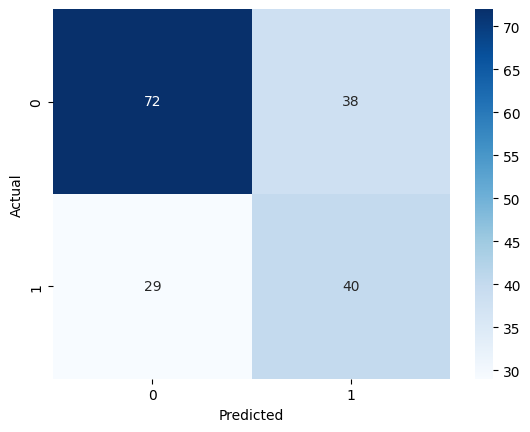

In [645]:
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show() 

### 4.5 Report Decision Tree Plot

A decision tree draws out a _tree_. This is our example tree:

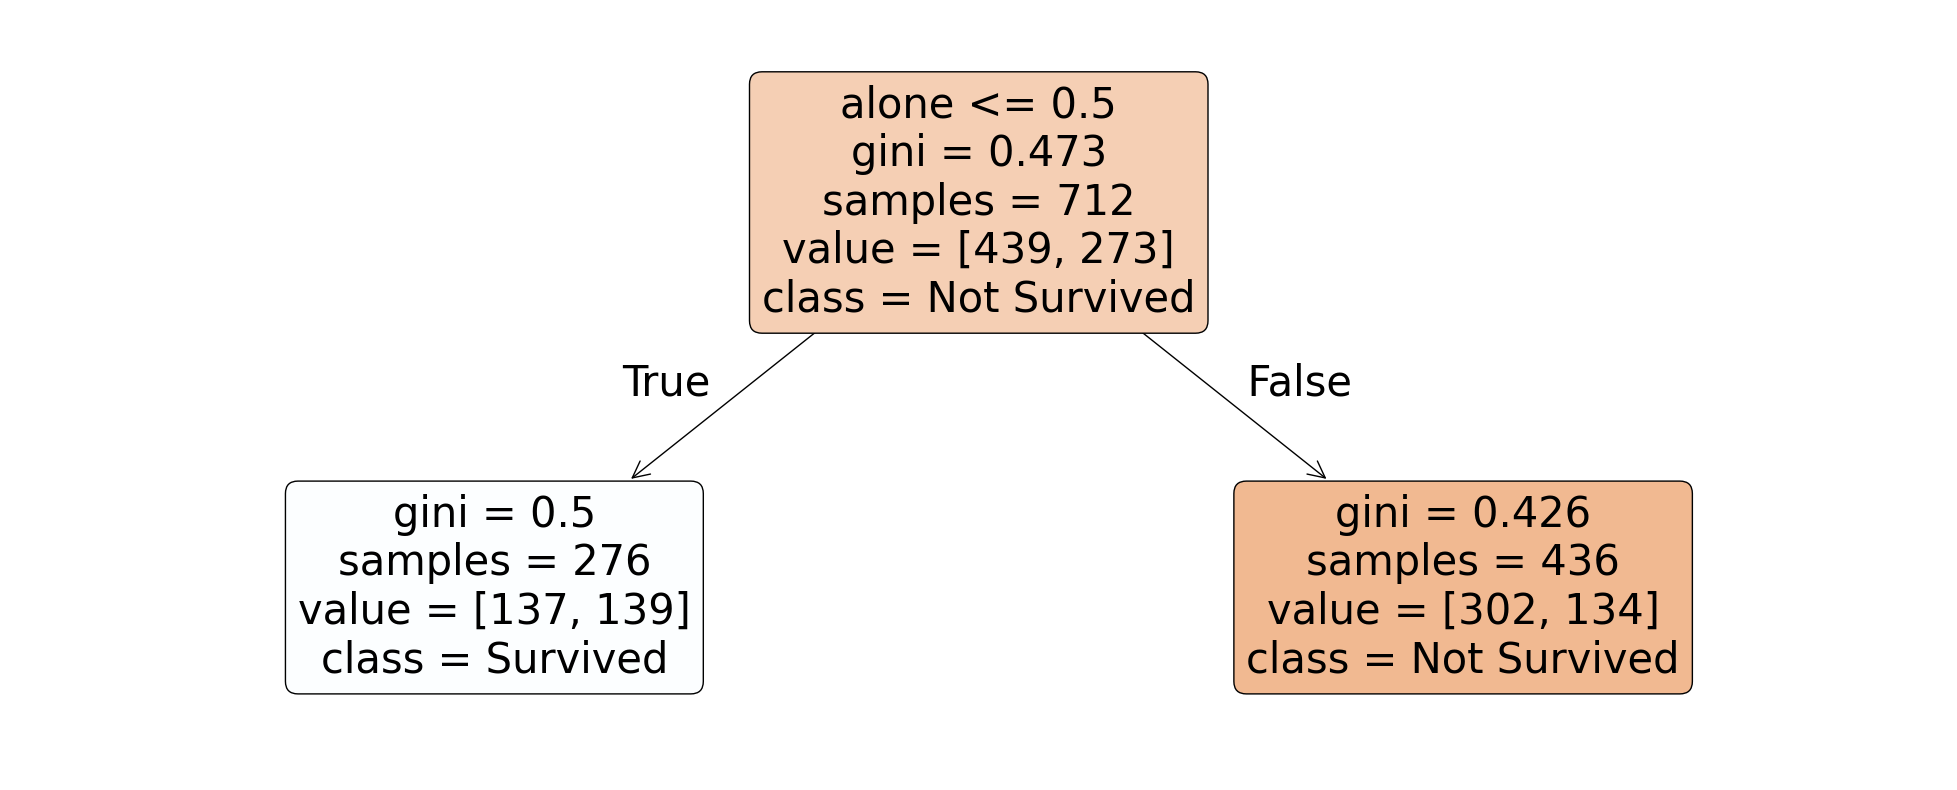

In [646]:
fig = plt.figure(figsize=(25,10))

plot_tree(tree_model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True, fontsize=30, rounded=True) # <- works better for small trees

# plot_tree(tree_model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()
fig.savefig("decision_tree_titanic.png")

### Reflection 4:

**How well did the different cases perform?**  

Overall - fairly well. 

**Are there any surprising results?**

I was surprised that `age` and `alone` were so close to being equally predictive. Although perhaps that should not have been surprising. The young and those alone do share some common factors.

**Which inputs worked better?**

The best results of all came from combining `age` and `sex`. The full table of results is at the bottom of this notebook.


## Section 5: Compare Alternative Models (SVC, NN)

### 5.1 Train and Evaluate Model (SVC)

Notes here borrowed from the assignment itself: 

In a Support Vector Machine, the kernel function defines how the algorithm transforms data to find a hyperplane that separates the classes. If the data is not linearly separable, changing the kernel can help the model find a better decision boundary.

SVC Kernel: Common Types

- RBF (Radial Basis Function) – Most commonly used; handles non-linear data well (default)
- Linear – Best for linearly separable data (straight line separation)
- Polynomial – Useful when the data follows a curved pattern
- Sigmoid – Similar to a neural network activation function; less common

In [647]:
# RBF Kernel (default) - same as calling SVC()
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)

# Linear Kernel
# svc_model = SVC(kernel='linear')
# svc_model.fit(X_train, y_train)

# Polynomial Kernel (e.g., with degree=3)
# svc_model = SVC(kernel='poly', degree=3)
# svc_model.fit(X_train, y_train)

# Sigmoid Kernel
# svc_model = SVC(kernel='sigmoid')
# svc_model.fit(X_train, y_train)

SVC()

In [648]:
y_pred_svc = svc_model.predict(X_test)

print("Results for SVC on test data:")
print(classification_report(y_test, y_pred_svc))

Results for SVC on test data:
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



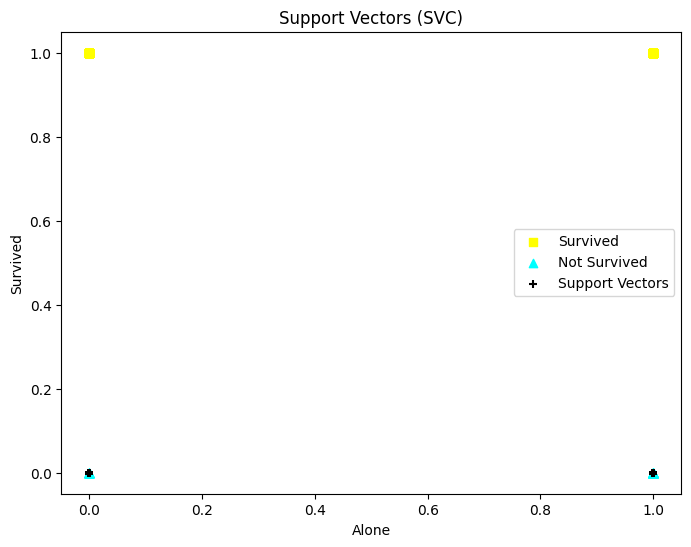

In [649]:


# Create data for charting - input target yes and input target no
survived_alone = X_test.loc[y_test == 1, 'alone']
not_survived_alone = X_test.loc[y_test == 0, 'alone']

# Create scatter plot for survived and not survived
plt.figure(figsize=(8, 6))
plt.scatter(survived_alone, y_test.loc[y_test == 1], c='yellow', marker='s', label='Survived')
plt.scatter(not_survived_alone, y_test.loc[y_test == 0], c='cyan', marker='^', label='Not Survived')

# Add support vectors (if available)
if hasattr(svc_model, 'support_vectors_'):
    support_x = svc_model.support_vectors_[:, 0]  # First feature (alone)
    support_y = svc_model.support_vectors_[:, 1] if svc_model.support_vectors_.shape[1] > 1 else None
    
    # Plot support vectors
    if support_y is not None:
        plt.scatter(support_x, support_y, c='black', marker='+', label='Support Vectors')
    else:
        plt.scatter(support_x, [0] * len(support_x), c='black', marker='+', label='Support Vectors')

# Add labels and legend
plt.xlabel('Alone')
plt.ylabel('Survived')
plt.legend()
plt.title('Support Vectors (SVC)')
plt.show()

### 5.2 Train and Evaluate Model (NN MLP)

In [650]:
nn_model = MLPClassifier(hidden_layer_sizes=(50, 25, 10), solver='lbfgs')
nn_model.fit(X_train, y_train) 

y_pred_nn = nn_model.predict(X_test)

print("Results for Neural Network on test data:")
print(classification_report(y_test, y_pred_nn))

Results for Neural Network on test data:
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



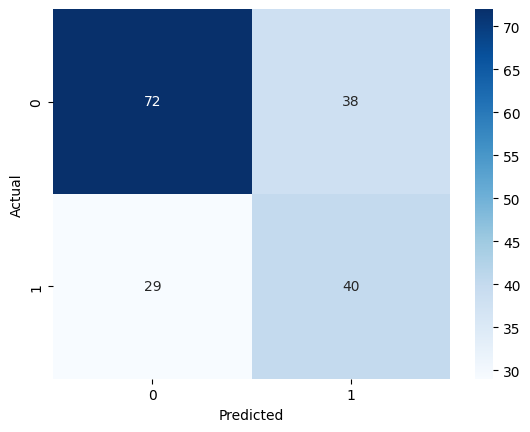

In [651]:
cm_nn = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(cm_nn, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Reflection 5

**How well did each model perform?**

The Decision Tree wins the day with the highest score in every category. 

**Are there any surprising results?**

I was surprised by the Decision Tree from Section 4 outperforming all the types of SVM Kernals **&** the neural net. I know neural nets need large datasets to avoid over-fitting the training data, but they have been so popular lately. I just assumed neural nets would be the top-performing contender.

I was also surprised by the completely unchanging *accuracy* across all techniques when only considering `alone`. Apparently it doesn't matter which method you use in some cases, the data have a predictive ceiling. 

**Why might one model outperform the others?**

Some models outperform others because of the underlying data may _just so happen_ to lend themselves to being better classified by a Linear Model (for example) than, say, a Neural Net. There are many types of data distributions in the world, and no single approach is going to be better for **all** of them. If there were one best model for all situations, we'd stop caring about the others. So it's good to try out several models to see which results are the most desirable.



## Section 6. Final Thoughts & Insights

### 6.1 Summarize Findings

The king of the day was the humble decision tree. I find that interesting, because a decision tree is sort of what I would picture an algorithm being run by a _human_ to look like, given this sort of task. 

The Neural Network was a very strong contendor - and I suspect if there were 100,000s of rows rather than 1,000s that the neural network would become the best predictor in the comparison. However, I'm sure humanity is relieved that the number of passengers in the dataset was **not** 100,000+ people. 

The Support Vector Model was the worst contendor, regardless of which kernal choice was made. Quite simply, if you were to use a scatter plot to visualize all the variables, you'd have a hard time drawing vectors to segment out regions containing a homogenous set of class members. Even simpler still: it didn't work well. 

### 6.2 Discuss Challenges Faced

I ran into difficulty with formatting the markdown table, as silly as that is, that might have taken the longest. Turns out there are some good online "format this table for me" tools. 

With regard to the classifiers, I had a hard time knowing whether the results I was seeing weren't changing because I did something _wrong_, or because they **really weren't changing** due to equalivalent performance. Eventually, I concluded that the `alone` input really just yield a consistent output. 

The visualization of the Support Vectors only worked for the single `alone` input. It is hardcoded in there, and I deemed the chart it produced not all that valuable, and thus didn't spend much time thinking about how to make the chart respond dynamically to changing inputs. 

### Next Steps

I could, given more time before this assignment is due, create a better method for comparing & constrasting all the various classfier results **simultaneously**. As is, I had to run the code iteratively, commenting things out in between runs, and note the results. 

## Final Results Table:

| Model Type               | Case   | Features Used     | Accuracy   | Precision   | Recall   | F1-Score    | Notes |
|------------              |--------|---------------    |----------  |-----------  |--------  |-----------  |-------|
| **Decision Tree**        | Case 1 | alone             | 63%        | 64%         | 63%      | 63%         | -     |
|                          | Case 2 | age               | 68%        | 68%         | 68%      | 64%         | -     |
|                          | Case 3 | age + sex         | 82%        | 82%         | 83%      | 82%         | Winner winner       |
|--------------------------|--------|-------------------|------------|-------------|----------|-------------|---------|
| **SVM (RBF Kernel)**     | Case 1 | alone             | 63%        | 64%         | 63%      | 63%         | -       |
|                          | Case 2 | age               | 63%        | 66%         | 63%      | 52%         | -       |
|                          | Case 3 | age + sex         | 64%        | 68%         | 64%      | 63%         | -       |
| -------------------      | ------ | ---------------   | ---------- | ----------- | -------- | ----------- | ------- |
| **SVM (Linear Kernel)**  | Case 1 | alone             | 63%        | 64%         | 63%      | 63%         | -       |
|                          | Case 2 | age               | 61%        | 38%         | 61%      | 47%         | -       |
|                          | Case 3 | age + sex         | 78%        | 78%         | 78%      | 78%         | -       |
| -------------------      | ------ | ---------------   | ---------- | ----------- | -------- | ----------- | ------- |
| **SVM (Poly Kernel)**    | Case 1 | alone             | 63%        | 64%         | 63%      | 63%         | -       |
|                          | Case 2 | age               | 61%        | 38%         | 61%      | 47%         | -       |
|                          | Case 3 | age + sex         | 68%        | 74%         | 68%      | 61%         | -       |
| -------------------      | ------ | ---------------   | ---------- | ----------- | -------- | ----------- | ------- |
| **SVM (Sigmoid Kernel)** | Case 1 | alone             | 63%        | 64%         | 63%      | 63%         | -       |
|                          | Case 2 | age               | 54%        | 53%         | 54%      | 53%         | -       |
|                          | Case 3 | age + sex         | 55%        | 55%         | 55%      | 55%         | -       |
| -------------------      | ------ | ---------------   | ---------- | ----------- | -------- | ----------- | ------- |
| **Neural Network (MLP)** | Case 1 | alone             | 63%        | 64%         | 63%      | 63%         | -       |
|                          | Case 2 | age               | 63%        | 66%         | 63%      | 52%         | -       |
|                          | Case 3 | age + sex         | 79%        | 79%         | 79%      | 79%         | Close second       |